In [1]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

/Users/floriankokoszka/Desktop/notebooks


'/Users/floriankokoszka/Desktop/notebooks'

In [2]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

%run mc_startup.ipynb
%run myfunctions.ipynb
%run myfunctions_plus.ipynb

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import xarray as xr

/Users/floriankokoszka/Desktop/notebooks


In [3]:
import numpy as np
import netCDF4 as nc4
from netCDF4 import Dataset, stringtochar
import pandas as pd
from types import SimpleNamespace

import pandas as pd
import os

In [4]:
from types import SimpleNamespace

def make_namespace(df, row1,row2):
    from types import SimpleNamespace
    x = SimpleNamespace()
    for _, row in df.iterrows():
        key = row[row1]
        value = row[row2]
        if pd.notna(key):  # Ignore les clés manquantes (NaN)
            key_str = str(key).strip().replace(" ", "_").replace("-", "_")
            setattr(x, key_str, value)
    return x

In [5]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import mat73
from datetime import datetime, timedelta

In [6]:
import glob
import os
import time

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm


In [8]:
import h5py
import numpy as np

def load_h5_recursive(group, path=''):
    data = {}
    for key, item in group.items():
        current_path = f"{path}/{key}" if path else key
        if isinstance(item, h5py.Dataset):  # Variable simple
            data[current_path] = np.array(item)
        elif isinstance(item, h5py.Group):  # Sous-structure
            data.update(load_h5_recursive(item, current_path))
    return data

### FIELDS

### Import .mat

In [9]:


dir_path = r'/Users/floriankokoszka/Desktop/TERESA/microrider/processing/QC/mat/'
dir_path = r'/Users/floriankokoszka/Desktop/TERESA/microrider/processing_gfm/QC/mat/'
dir_path = r'/Volumes/DENISE/data/glider/teresa/microrider/processing_gfm_II/QC/mat/'
dir_path = r'/Volumes/ORSO/TERESA/microrider/processing/L4/mat/'

file_typ = '.mat'

# Get list of all files only in the given directory
list_of_files = filter( os.path.isfile, glob.glob(dir_path + '*'+file_typ) )
# Sort list of files based on last modification time in ascending order
list_of_files = sorted( list_of_files, key = os.path.getmtime)
# Iterate over sorted list of files and print file path 
# along with last modification time of file 
for file_path in list_of_files:
    timestamp_str = time.strftime(  '%m/%d/%Y :: %H:%M:%S',
                                time.gmtime(os.path.getmtime(file_path))) 
    #print(timestamp_str, ' -->', file_path) 
    
RES = list_of_files

print('path:',dir_path,'\n',
      'files:',len(RES),'\n',
      'file 1:',RES[0],'\n',
      'file N:',RES[len(RES)-1],'\n')

res = RES
len(res)

path: /Volumes/ORSO/TERESA/microrider/processing/L4/mat/ 
 files: 3503 
 file 1: /Volumes/ORSO/TERESA/microrider/processing/L4/mat/TERESA_MR_L4QC_converted_file_0011_DAT_2015_08_12_10_32_30_lat_39_4917_lon_06_5837_nav_W_pmin_0003_pmax_0905_sec_001_on_004_glid_down.mat 
 file N: /Volumes/ORSO/TERESA/microrider/processing/L4/mat/TERESA_MR_L4QC_converted_file_0955_DAT_157_2024_07_04_05_30_11_lat_39_2091_lon_02_3364_nav_W_pmin_0003_pmax_0053_sec_002_on_002_glid_upwd.mat 



3503

In [10]:
import h5py
import numpy as np

def load_h5_recursive(group, path=''):
    """
    Fonction récursive pour charger toutes les variables d'un fichier HDF5.
    """
    data = {}
    for key, item in group.items():
        current_path = f"{path}/{key}" if path else key
        if isinstance(item, h5py.Dataset):  # Variable simple
            data[current_path] = np.array(item)
        elif isinstance(item, h5py.Group):  # Sous-structure
            data.update(load_h5_recursive(item, current_path))
    return data

In [11]:
p = 1000
fn = res[p]
print(fn)

with h5py.File(fn, 'r') as f:
    meta_vars = list(f['mr/meta'].keys()) if 'mr/meta' in f else []
    print("Variables dans meta :", meta_vars)
    
    L2_vars = list(f['mr/L2_params'].keys()) if 'mr/L2_params' in f else []
    print("\nVariables dans L2_params :", L2_vars)
    
    L3_vars = list(f['mr/L3_params'].keys()) if 'mr/L3_params' in f else []
    print("\nVariables dans L3_params :", L3_vars)
    
    L4_vars = list(f['mr/L4'].keys()) if 'mr/L4' in f else []
    print("\nVariables dans L4 :", L4_vars)
    
    QC_vars = list(f['mr/QC'].keys()) if 'mr/QC' in f else []
    print("\nVariables dans QC :", QC_vars)
    


/Volumes/ORSO/TERESA/microrider/processing/L4/mat/TERESA_MR_L4QC_converted_file_0505_DAT_2022_11_09_11_37_02_lat_39_4826_lon_07_5242_nav_W_pmin_0003_pmax_0948_sec_001_on_010_glid_down.mat
Variables dans meta : ['aoa', 'constant_temp', 'datenum_end', 'datenum_start', 'datetime_end', 'datetime_start', 'direction_section', 'distance', 'dn', 'dt', 'duration_hours', 'duration_minutes', 'fullPath', 'lat', 'lat_end', 'lat_max', 'lat_mean', 'lat_min', 'lat_start', 'length_origina', 'length_section', 'lon', 'lon_end', 'lon_max', 'lon_mean', 'lon_min', 'lon_start', 'navig_dir', 'navig_dir_str', 'number_of_sections', 'odas_version', 'percen_origina', 'pres_delta', 'pres_max', 'pres_min', 'pres_start_end', 'profile_dir', 'section_direct', 'section_direct_str', 'section_indexes', 'section_number', 'setupfilestr', 'speed_algorithm', 'speed_cutout', 'speed_mean', 'speed_source', 'speed_tau', 'tau', 'thermistor_source', 'time_offset', 'vehicle', 'w_mean']

Variables dans L2_params : ['Fhp', 'L_fft', '

In [13]:
with h5py.File(fn, 'r') as f:
    all_data = load_h5_recursive(f)

for key in all_data.keys():
    # print(key)
    str2exec = key.split('/')[-1] +'= all_data["'+key+'"].ravel()'
    exec(str2exec)

In [246]:
LIST_SHEARS = [
'II',
'ts_eps','dt_eps','dn_eps',
'speed',
'speed_std',
'AOA', 
'P',  
'T','T1','T2','nu',
'lon_eps',  
'lon_eps',  
'nu', 
'z',  
    
    
'e1',
'e2',  
'sig_ln_e1',
'sig_ln_e2',
'sig_ln_psi_on_sqrt_Ns1',
'sig_ln_psi_on_sqrt_Ns2',


'kmin1','kmin2',
    
'kmax1',
'kmax2',  
'dof_e1',
'dof_e2',  
'method_sh1',
'method_sh2',  
'fm1',
'fm2',
'mad1',
'mad2',  
'Vf1',
'Vf2',
'Ns1','Ns2',
    
'dspk_cntpass1',
'dspk_cntpass2',
    
'dspk_frac1',
'dspk_frac2',
    
'Q1', 'Q2',
'Q_aoa', 
'Q_e1_eratio', 'Q_e2_eratio',
'Q_figofmer1', 'Q_figofmer2',
'Q_spikfrac1', 'Q_spikfrac2',
'Q_spikpass1', 'Q_spikpass2',
'Q_varresol1', 'Q_varresol2',



    
]  

In [247]:
LIST_GLIDER = [
'II',
'ts_eps','dt_eps','dn_eps',
'speed',
'speed_std',
'roll',
'roll_gl',
'pitch',
'pitch_gl',
'AOA', 
'P',  
'T','T1','T2','nu',
'P','C','SP','SA', 'rho',
]

In [248]:
LIST_SECTION = [
'II_u',
'ts_eps_u','dt_eps_u','dn_eps_u',
'despike_sh1_ratio',
'despike_sh2_ratio',
'despike_sh1_passcount',
'despike_sh2_passcount',

'fs_fast',
'fs_slow',
'direction_section',
'speed_mean',
'vehicle_length',
'tau_to_avoidadv',
'tau_to_resolve_05cpm',
'tau_fft',
'c1',
'c2',
'Th_source_logic',
'T_source_logic',
'f_AA',
'fft_length',
'diss_length',
'overlap',
'goodman',
'Fhp',
'kl',
'L_fft',
'N_fft',

'figofmer_fail',
'epsratio_fail_vsr_thresh',
'epsratio_fail_isr_thresh',
'spikfrac_fail',
'spikfrac_failr',
'spikpass_fail',
'varresol_fail',
'f_limit',
'fit_2_isr',
'spectral_model',
'npoles',
'sL',
'sW',
'sOV',
'Tdis',
'q',
'tau_0',
'time_corr',
'int_range',  
]

In [249]:
# SHEARS, SECTION, GLIDER
#
DF1 = pd.DataFrame()
DF2 = pd.DataFrame()
DF3 = pd.DataFrame()
erreurs_idx = []
for p in tqdm(range(len(res))):
    fn = res[p]
    
    try:
        with h5py.File(fn, 'r') as f:
            all_data = load_h5_recursive(f)

        for key in all_data.keys():
            # print(key)
            str2exec = key.split('/')[-1] +'= all_data["'+key+'"].ravel()'
            exec(str2exec)

        dn = dn_eps 
        dt = np.array([datetime.fromordinal(int(d)) + timedelta(days=d % 1) - timedelta(days=366) for d in dn])
        dt_eps = dt ; 
        ts = np.array([t.timestamp() for t in dt])
        ts_eps = ts; 
        II = np.ones(ts_eps.shape)*p
        dspk_cntpass1 = np.ones(ts_eps.shape)*despike_sh1_passcount
        dspk_cntpass2 = np.ones(ts_eps.shape)*despike_sh2_passcount
        kmin1 = np.ones(ts_eps.shape)*kl
        kmin2 = np.ones(ts_eps.shape)*kl

        II_u, ts_eps_u, dt_eps_u, dn_eps_u = [p], [ts_eps[0]], [dt_eps[0]], [dn_eps[0]]
        goodman = 1 ; 
        fit_2_isr = 1e-5 ;
        spectral_model = 1 ; #'Lueck'  
        Tdis = 1; #'Kraichnan'
        time_corr = 1 ; #'RSI'
        int_range = 1 ; #'S'
        npoles = 1 ; #'single' ;
        epsratio_fail_vsr_thresh = 2.77 ; 
        epsratio_fail_isr_thresh = 4.2 ;
        
       
        #
        L = LIST_SHEARS
        loaded_data = {var: globals()[var] for var in L}  # Accès aux variables chargées
        df = pd.DataFrame(loaded_data)
        DF1 = pd.concat([DF1, df], ignore_index=True)
        del loaded_data, df
        
        L = LIST_SECTION
        loaded_data = {var: globals()[var] for var in L}  # Accès aux variables chargées
        df = pd.DataFrame(loaded_data)
        DF2 = pd.concat([DF2, df], ignore_index=True)
        del loaded_data, df
        
        L = LIST_GLIDER
        loaded_data = {var: globals()[var] for var in L}  # Accès aux variables chargées
        df = pd.DataFrame(loaded_data)
        DF3 = pd.concat([DF3, df], ignore_index=True)
        del loaded_data, df
        
        


    except OSError:
        erreurs_idx.append(p)
        continue  # on ignore et on continue
            
DF1 = DF1.sort_values(by='dt_eps')
DF1 = DF1.reset_index(drop=True)
SHEARS = DF1.copy()

DF3 = DF3.sort_values(by='dt_eps')
DF3 = DF3.reset_index(drop=True)
GLIDER = DF3.copy()


DF2 = DF2.sort_values(by='dt_eps_u')
DF2 = DF2.reset_index(drop=True)
SECTION = DF2.copy()
del DF1, DF2, DF3

print(SHEARS.shape)
print(SECTION.shape)
print(GLIDER.shape)

100%|██████████| 3503/3503 [39:05<00:00,  1.49it/s]


(1571516, 53)
(3503, 48)
(1571516, 20)


In [250]:
# debug
for name, var in loaded_data.items():
    try:
        dim = var.shape
    except AttributeError:
        try:
            dim = (len(var),)
        except:
            dim = "N/A"
    print(name, dim)

NameError: name 'loaded_data' is not defined

In [ ]:
npoles

In [251]:
XX = SHEARS.copy()
xx = XX.drop_duplicates(subset='ts_eps')
xx = xx.reset_index(drop=True)
SHEARS2 = xx
del xx
print(SHEARS.shape,SHEARS2.shape)
SHEARS = SHEARS2

(1571516, 53) (1551524, 53)


In [252]:
XX = GLIDER.copy()
xx = XX.drop_duplicates(subset='ts_eps')
xx = xx.reset_index(drop=True)
GLIDER2 = xx
del xx
print(GLIDER.shape,GLIDER2.shape)
GLIDER = GLIDER2

(1571516, 20) (1551524, 20)


In [253]:
XX = SECTION.copy()
xx = XX.drop_duplicates(subset='ts_eps_u')
xx = xx.reset_index(drop=True)
SECTION2 = xx
del xx
print(SECTION.shape,SECTION2.shape)
SECTION = SECTION2

(3503, 48) (3446, 48)


In [254]:
X = SHEARS.copy()
FNAME = 'TERESA_MR_L4_processing_005_13072025_SHEARS.csv' 
out_path = '/Volumes/ORSO/TERESA/microrider/export/L4QC/'
X.to_csv(out_path+FNAME, index = False)
print('Done')
del X

Done


In [255]:
X = SECTION.copy()
FNAME = 'TERESA_MR_L4_processing_005_13072025_SECTION.csv' 
out_path = '/Volumes/ORSO/TERESA/microrider/export/L4QC/'
X.to_csv(out_path+FNAME, index = False)
print('Done')
del X

Done


In [256]:
X = GLIDER.copy()
FNAME = 'TERESA_MR_L4_processing_005_13072025_GLIDER.csv' 
out_path = '/Volumes/ORSO/TERESA/microrider/export/L4QC/'
X.to_csv(out_path+FNAME, index = False)
print('Done')
del X

Done


In [257]:
LIST_THERMS = [
'II',
'ts_eT','dt_eT',
'dn_eT1',
'lon_eT1','lat_eT1',
'Z_eT1','P_eT1','T_eT1','nu_eT1',  'td_eT1', 
'eT1','xit1','xiv1',
'qc_flag_T1', 'qc_mad_ST1', 'qc_mad_T1',  'qc_mad_c1', 
'kB_T1',  
'kL_T1', 
'kU_T1',
'kP_T1',
'likehratio1',
    
'dn_eT2',
'lon_eT2','lat_eT2',
'Z_eT2','P_eT2','T_eT2','nu_eT2',  'td_eT2', 
'eT2','xit2','xiv2',
'qc_flag_T2', 'qc_mad_ST2', 'qc_mad_T2',  'qc_mad_c2',
'kB_T2',  
'kL_T2', 
'kU_T2',
'kP_T2',
'likehratio2', 
    
'QC_FP07_1', 'QC_FP07_2', 'Q_T1',  'Q_T2', 'Q_T1T2_SPREAD', 

    
    
]

In [258]:
# FP07-1,2

DF = pd.DataFrame()
erreurs_idxT = []
#for p in range(3724,len(res)):
#    p

for p in tqdm(range(len(res))):
    fn = res[p]

    try:
        with h5py.File(fn, 'r') as f:
            all_data = load_h5_recursive(f)

        for key in all_data.keys():
            # print(key)
            str2exec = key.split('/')[-1] +'= all_data["'+key+'"].ravel()'
            exec(str2exec)

        dn = dn_eT1 
        if dn[0]>0:
            dt = np.array([datetime.fromordinal(int(d)) + timedelta(days=d % 1) - timedelta(days=366) for d in dn])
            dt_eT = dt ; 
            ts = np.array([t.timestamp() for t in dt])
            ts_eT = ts; 
            II = np.ones(ts_eT.shape)*p 
            

            #dn = dn_eT 
            #dt = np.array([datetime.fromordinal(int(d)) + timedelta(days=d % 1) - timedelta(days=366) for d in dn])
            #ts_eT = np.array([t.timestamp() for t in dt])
            #dt_eT = dt ; 
            
            L = LIST_THERMS
            loaded_data = {var: globals()[var] for var in L}  # Accès aux variables chargées
            df = pd.DataFrame(loaded_data)

            DF = pd.concat([DF, df], ignore_index=True)

    except OSError:
        erreurs_idxT.append(p)
        continue  # on ignore et on continue

DF = DF.sort_values(by='dt_eT')
DF = DF.reset_index(drop=True)
THERMS = DF.copy()
THERMS.shape

100%|██████████| 3503/3503 [29:23<00:00,  1.99it/s]


(1565527, 48)

In [259]:
XX = THERMS.copy()
xx = XX.drop_duplicates(subset='ts_eT')
xx = xx.reset_index(drop=True)
THERMS2 = xx
del xx
print(THERMS.shape,THERMS2.shape)
THERMS = THERMS2

(1565527, 48) (1548828, 48)


In [260]:
X = THERMS.copy()
FNAME = 'TERESA_MR_L4_processing_005_13072025_THERMS.csv' 
out_path = '/Volumes/ORSO/TERESA/microrider/export/L4QC/'
X.to_csv(out_path+FNAME, index = False)
print('Done')
del X

Done


### LOAD CSV

In [9]:
THERMS = pd.read_csv('/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_L4_processing_005_13072025_THERMS.csv')
SHEARS = pd.read_csv('/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_L4_processing_005_13072025_SHEARS.csv')
GLIDER = pd.read_csv('/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_L4_processing_005_13072025_GLIDER.csv')
SECTION = pd.read_csv('/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_L4_processing_005_13072025_SECTION.csv')


In [10]:
N_SECTION = np.arange(len(SECTION['II_u']))
SECTION['N_SECTION'] = N_SECTION 

TIME_SPECTRA_SHEAR = np.array(SHEARS['ts_eps'] )
SHEARS['TIME_SPECTRA_SHEAR'] = TIME_SPECTRA_SHEAR
 
TIME_SPECTRA_THERM = np.array(THERMS['ts_eT']  )
THERMS['TIME_SPECTRA_THERM'] = TIME_SPECTRA_THERM

N_SHEAR_SENSORS = np.array([2,1])
#SHEARS['N_SHEAR_SENSORS'] = N_SHEAR_SENSORS

N_THERM_SENSORS = np.array([2,1])
#THERMS['N_THERM_SENSORS'] = N_THERM_SENSORS

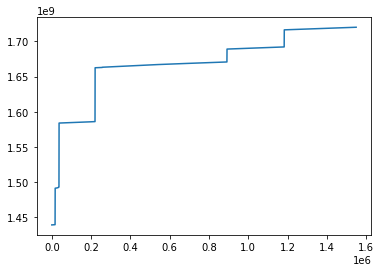

In [11]:
plt.plot(TIME_SPECTRA_THERM)

### indexes

In [12]:
II_u = np.array(SECTION['II_u'])
II = np.array(SHEARS['II'])
IIT = np.array(THERMS['II']); 



### GPS

In [13]:
GPS = pd.read_csv('/Volumes/ORSO/TERESA/glider/GPS/df_GPS.csv')
ts_gl = np.array(GPS['ts_gl'])
lon_gl = np.array(GPS['lon_gl'])
lat_gl = np.array(GPS['lat_gl'])

### TIME LON LAT

In [14]:
z = np.array(SHEARS['z']) 
dt = np.array(pd.to_datetime(SHEARS['dt_eps']))
ts = np.array((SHEARS['ts_eps']))
yyyy = dt.astype('datetime64[Y]').astype(int) + 1970

mm = dt.astype('datetime64[M]').astype(int) % 12 + 1
dy = (dt - dt.astype('datetime64[Y]')).astype('timedelta64[D]').astype(int) + 1
wy = (dy - 1) // 7 + 1

#lon = np.array(SHEARS['lon_eps'])
#lat = np.array(SHEARS['lat_eps'])

II = np.array(SHEARS['II'])

T = np.array(SHEARS['T'])
T1 = np.array(SHEARS['T1'])
T2 = np.array(SHEARS['T2'])

elapsed = (dt - dt[0]).astype('timedelta64[s]').astype(int)
print(np.nanmedian(np.diff(z)),np.nanmedian(np.diff(elapsed)))

-0.7393724128121866 10.0


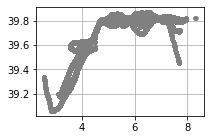

In [15]:
longl = interpholes(ts_gl,lon_gl,ts)
latgl = interpholes(ts_gl,lat_gl,ts)

fig , axs =  plt.subplots(1, 1, figsize=(3,2))
ax = axs
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid()
ax.plot(longl,latgl,'.',alpha=.5,color='gray')

In [16]:
tsT = np.array((THERMS['ts_eT']))
zT = np.array(THERMS['Z_eT1'])
dtT = np.array(pd.to_datetime(THERMS['dt_eT']))
tsT = np.array((THERMS['ts_eT']))
yyyyT = dtT.astype('datetime64[Y]').astype(int) + 1970

mmT = dtT.astype('datetime64[M]').astype(int) % 12 + 1
dyT = (dtT - dtT.astype('datetime64[Y]')).astype('timedelta64[D]').astype(int) + 1
wyT = (dyT - 1) // 7 + 1

#lonT = np.array(THERMS['lon_eT1'])[idx1]
#latT = np.array(THERMS['lat_eT1'])[idx1]
IIT = np.array(THERMS['II'])
T_eT1 = np.array(THERMS['T_eT1'])

T_eT1 = np.array(THERMS['T_eT2'])

elapsed = (dtT - dtT[0]).astype('timedelta64[s]').astype(int)
print(np.nanmedian(np.diff(zT)),np.nanmedian(np.diff(elapsed)))

-0.7302854049133991 10.0


In [17]:
longlT = interpholes(ts_gl,lon_gl,tsT)
latglT = interpholes(ts_gl,lat_gl,tsT)

### COORDS

In [18]:
lonT = longlT
latT = latglT

lon = longl
lat = latgl

SHEARS['lon'] = lon ;
SHEARS['lat'] = lat ;
THERMS['lonT'] = lonT ;
THERMS['latT'] = latT ;


### Epsilon

In [19]:
e1 = np.array(SHEARS['e1'])
e2 = np.array(SHEARS['e2'])

Q1 = np.array(SHEARS['Q1'])
Q2 = np.array(SHEARS['Q2'])

Q_figofmer1= np.array(SHEARS['Q_figofmer1'])
Q_figofmer2 = np.array(SHEARS['Q_figofmer2'])
Q_spikfrac1 = np.array(SHEARS['Q_spikfrac1'])
Q_spikfrac2 = np.array(SHEARS['Q_spikfrac2'])
Q_e1_eratio = np.array(SHEARS['Q_e1_eratio'])
Q_e2_eratio = np.array(SHEARS['Q_e2_eratio'])
Q_spikpass1 = np.array(SHEARS['Q_spikpass1'])
Q_spikpass2 = np.array(SHEARS['Q_spikpass2'])
Q_varresol1 = np.array(SHEARS['Q_varresol1'])
Q_varresol2 = np.array(SHEARS['Q_varresol2'])

Q_aoa = np.array(SHEARS['Q_aoa'])


### QC MODIF

In [22]:
FOM1 = np.array(SHEARS['fm1'])
FOM2 = np.array(SHEARS['fm2'])

In [21]:
Q_FOM1 = np.array([0]*len(FOM1))
Q_FOM2 = np.array([0]*len(FOM2))
f1 = np.where( (FOM1>1.4) )[0]
f2 = np.where( (FOM2>1.4) )[0]
Q_FOM1[f1] = 1 ;
Q_FOM2[f2] = 1 ; 

In [720]:
Q1 = Q1 - Q_FOM1 
Q2 = Q2 - Q_FOM1 

In [721]:
Q_FOM1 = np.array([0]*len(FOM1))
Q_FOM2 = np.array([0]*len(FOM2))
f1 = np.where( (FOM1>1.7) )[0]
f2 = np.where( (FOM2>1.7) )[0]
Q_FOM1[f1] = 1 ;
Q_FOM2[f2] = 1 ; 
f1 = np.where( (FOM1>1.4) & (FOM1 <= 1.7))[0]
f2 = np.where( (FOM2>1.4) & (FOM1 <= 1.7))[0]
Q_FOM1[f1] = 256 ;
Q_FOM2[f2] = 256 ; 
Q1 = Q1+Q_FOM1 ; 
Q2 = Q2+Q_FOM2 ; 

In [722]:
SHEARS['Q1'] = Q1 
SHEARS['Q2'] = Q2 

### Chi chi chi 

In [23]:
xi1 = np.array(THERMS['xit1'])
xi2 = np.array(THERMS['xit2'])

QC_FP07_1 = np.array(THERMS['QC_FP07_1'])
QC_FP07_2 = np.array(THERMS['QC_FP07_2'])
Q_T1 = np.array(THERMS['Q_T1'])
Q_T2 = np.array(THERMS['Q_T2'])
Q_T1T2_SPREAD = np.array(THERMS['Q_T1T2_SPREAD'])


In [24]:
print(len(Q_T1),len(Q_T2))

1548828 1548828


### QC CHOICES AND COMBINATIONS

In [25]:
qc0T1 = np.where( (QC_FP07_1 ==0)  )[0]
qc0T1b = np.setdiff1d(np.arange(len(xi1)), qc0T1)

qc0T2 = np.where( (QC_FP07_2 ==0)  )[0]
qc0T2b = np.setdiff1d(np.arange(len(xi2)), qc0T2)

qc0T = np.where( (QC_FP07_1 ==0) & (QC_FP07_2==0) )[0]
qc0Tb = np.setdiff1d(np.arange(len(xi1)), qc0T)

qc0T12 = np.where( (QC_FP07_1==0) | (QC_FP07_2==0)  )[0]
qc0T12b = np.setdiff1d(np.arange(len(xi2)), qc0T12)


print(len(qc0T),len(qc0T1),len(qc0T2),len(qc0T12))


xi = (xi1+xi2)/2
xixi = np.array([np.nan]*len(xi))



xixi[qc0T] = xi[qc0T]

THERMS['xixi'] = xixi 

259086 309802 299453 350169


In [26]:

ee = (e1+e2)/2

#------------
qc0 = np.where( (Q1==0) & (Q2==0) & (np.isfinite(ee)==True))[0]
qc2 = np.where( (Q1==2) & (Q2==2)& (np.isfinite(ee)==True))[0]
qc32 = np.where( (Q1==32) & (Q2==32)& (np.isfinite(ee)==True))[0]

qc032 = np.sort(np.concatenate((qc0,qc32)))

qc0_1 = np.where( (Q1==0) & (np.isfinite(e1)==True))[0]
qc0_2 = np.where( (Q2==0) & (np.isfinite(e2)==True))[0]

qc32_1 = np.where( (Q1==32)& (np.isfinite(e1)==True) )[0]
qc32_2 = np.where( (Q2==32)& (np.isfinite(e2)==True) )[0]

qc8_1 = np.where( (Q1==8) & (np.isfinite(e1)==True))[0]
qc8_2 = np.where( (Q2==8) & (np.isfinite(e2)==True))[0]

qc0b = np.setdiff1d(np.arange(len(e1)), qc0)
qc32b = np.setdiff1d(np.arange(len(e1)), qc32)
qc032b = np.setdiff1d(np.arange(len(e1)), qc32b)

print(len(qc0),len(qc032),len(qc0_1),len(qc0_2))


eeee = np.array([np.nan]*len(ee))
eeee[qc0] = ee[qc0]
SHEARS['eeee'] = eeee 

ee1 = ee*np.nan
ee2 = ee*np.nan
ee1[qc0_1] = e1[qc0_1]
ee2[qc0_2] = e2[qc0_2]


157039 162439 435071 490674


In [343]:
print(      '—————————————————————————————————————',

    '\nTOTAL  sh1,2                 ',len(e1),
      '\nQC0    sh1,2 combined         ',len(qc0),
      '\nQC32   sh1,2 combined           ',len(qc32),
      '\nQC0,32 sh1,2 combined         ',len(qc032),
      '\n———',
      '\nQC0    sh1 alone              ',len(qc0_1),
      '\nQC0    sh2 alone              ',len(qc0_2),
      '\n',
      '\n—————————————————————————————————————',
      '\nTOTAL  fp07 1,2              ',len(xi1),
      
       '\nQC0    fp07 1,2 combined      ',len(qc0T),
      '\nQC0    fp07 one among 1,2     ',len(qc0T12),
      '\n———',
      '\nQC0    fp07 1 alone           ',len(qc0T1),
      '\nQC0    fp07 2 alone           ',len(qc0T2),
      '\n'
     )

————————————————————————————————————— 
TOTAL  sh1,2                  1551524 
QC0    sh1,2 combined          157039 
QC32   sh1,2 combined            5400 
QC0,32 sh1,2 combined          162439 
——— 
QC0    sh1 alone               435071 
QC0    sh2 alone               490674 
 
————————————————————————————————————— 
TOTAL  fp07 1,2               1548828 
QC0    fp07 1,2 combined       259086 
QC0    fp07 one among 1,2      350169 
——— 
QC0    fp07 1 alone            309802 
QC0    fp07 2 alone            299453 



### Variables 2,1

In [27]:
e1e2 = np.array(SHEARS[['e1','e2']])
estd1estd2_vsr = np.array(SHEARS[['sig_ln_e1','sig_ln_e1']])
estd1estd2_isr = np.array(SHEARS[['sig_ln_psi_on_sqrt_Ns1','sig_ln_psi_on_sqrt_Ns2']])
Q1Q2 = np.array(SHEARS[['Q1','Q2']])
kmin1kmin2 = np.array(SHEARS[['kmin1','kmin2']])
kmax1kmax2 = np.array(SHEARS[['kmax1','kmax2']])
Ns1Ns2 = np.array(SHEARS[['Ns1','Ns2']])
fm1fm2 = np.array(SHEARS[['fm1','fm2']])
mad1mad2 = np.array(SHEARS[['mad1','mad2']])
Vf1Vf2 = np.array(SHEARS[['Vf1','Vf2']])
frac1frac2 = np.array(SHEARS[['dspk_frac1','dspk_frac2']])
pass1pass2 = np.array(SHEARS[['dspk_cntpass1','dspk_cntpass2']])

xi1xi2 = np.array(THERMS[['xit1','xit2']])
QT1QT2 = np.array(THERMS[['QC_FP07_1','QC_FP07_2']])
kB1kB2 = np.array(THERMS[['kB_T1','kB_T2']])
kL1kL2 = np.array(THERMS[['kL_T1','kL_T2']])
kU1kU2 = np.array(THERMS[['kU_T1','kU_T2']])
kP1kP2 = np.array(THERMS[['kP_T1','kP_T2']])
LR1LR2 = np.array(THERMS[['likehratio1','likehratio2']])
madT1madT2 = np.array(THERMS[['qc_mad_T1','qc_mad_T2']])
madcT1madcT2 = np.array(THERMS[['qc_mad_c1','qc_mad_c2']])

### GLOBAL attributes

In [28]:
globalattr = SimpleNamespace()

In [30]:
globalattr.title = 'A Reference Glider-Based Microstructure Dataset from the Western Mediterranean'
globalattr.authors= 'Florian V. M. Kokoszka, Mireno Borghini, Katrin Schroeder, Jacopo Chiggiato, Albert Mirrales, Joaquín Tintoré, Nikolaos Zarokanellos, Albert Miralles, Patricia Rivera Rodríguez,Manuel Rubio, Miguel Charcos, Benjamín Casas, and Anneke T. Doeschate'
globalattr.summary= 'We present a comprehensive dataset of turbulence microstructure measurements collected with a Micro Rider (MR) from Rockland Scientific International (RSI) mounted on the Slocum Deep Glider “Teresa” across repeated transects between Sardinia and the Balearic Islands (SMART missions, 2015–2024). This dataset constitutes one of the most extensive autonomous glider-based microstructure archives to date for the Western Mediterranean, containing glider sections and delivering quality-controlled vertical profiles of turbulent kinetic energy dissipation rate (ε) and thermal variance dissipation rate (χ) across seasonal cycles and diverse water masses. The data were processed through a rigorous multilevel workflow (L0–L4), following community best practices for calibration, quality control, and uncertainty quantification. Final products include ε estimates from dual shear probes and complementary χ-derived dissipation, aligned with co-located hydrographic and biogeochemical measurements. This dataset provides a high-resolution resource for investigating fine-scale mixing, validating parameterizations, and improving turbulence representation in models. All data and processing codes are openly provided to support reuse, reproducibility, and integration into global efforts advancing the inclusion of turbulence as an Essential Ocean Variable. '
globalattr.comment = 'This dataset was collected using a MicroRider-1000 microstructure package mounted on the glider "Teresa" during repeated missions between Sardinia and the Balearic Islands (2015–2024). It includes quality-controlled estimates of ε and χ derived from shear probes and fast thermistors. The processing followed a multi-level workflow (L0–L4) using ODAS MATLAB routines and validated community practices, with attention to glider flight dynamics, sensor stability, and spectral fitting to turbulence models such as Nasmyth and Batchelor.'
globalattr.platform= 'sub-surface glider'
globalattr.source= 'MicroRider MR-1000-LP (RSI)'
globalattr.date_created= '2025-07-27T12:00:00Z'
globalattr.date_modified= '2025-07-27T12:00:00Z'
globalattr.time_reference_year= '2015-2024'
globalattr.time_coverage_start= '2015-08-12T10:32:44Z'
globalattr.time_coverage_end= '2024-07-04T05:36:51Z'

globalattr.area= 'Western Mediterranean Sea'
globalattr.principal_investigator= 'Florian Volmer Martin Kokoszka, CNR-ISMAR, Napoli'
globalattr.contact= 'Florian Volmer Martin Kokoszka, CNR-ISMAR, Napoli'
globalattr.project= 'TOWARDS AN ALLIANCE OF EUROPEAN RESEARCH FLEETS'
globalattr.cruise= 'SMART: Sardinia - MAllorca Repeated Transect'
globalattr.references= 'Lueck et al. 2024; Fer et al. 2024; Le Boyer et al. 2023: Piccolroaz et al. 2021'
globalattr.keywords= 'turbulence, microstructure, dissipation, thermal variance, glider, dataset'
globalattr.creator_name= 'Florian Volmer Martin Kokoszka'
globalattr.creator_email= 'florian.kokoszka @ na.ismar.it'
globalattr.creator_url= 'https://orcid.org/0000-0001-5346-3058'
globalattr.acknowledgement= 'We thank all the technicians and engineers at SOCIB (Balearic Islands Coastal Observing and Forecasting System, Palma, Spain) and Rockland Scientific for their essential work in the deployment operations and data support throughout the various mission years.'
globalattr.station_name= 'SMART Transects'
globalattr.license= 'http://creativecommons.org/licenses/by/4.0/'

globalattr.vehicle= 'Glider'
globalattr.model= 'Slocum Deep Glider G2 (Teledyne)'
globalattr.instrument= 'MicroRider MR-1000-LP (RSI)'
globalattr.institution= 'CNR-ISMAR'
globalattr.address= 'CNR ISMAR – Institute of Marine Science, Arsenale – Tesa 104, Castello 2737/F, 30122 Venezia, Italy'
globalattr.project= 'Eurofleets'
globalattr.baselocation= 'Lerici (La Spezia), ITALY'
globalattr.contacts= 'Mireno Borghini (PI), Katrin Schroeder (PI)'
globalattr.history= 'Version 1.0, FK 07-2025'
globalattr.conventions= 'CF-1.6, ACDD-1.3, ATOMIX-1.0'

In [31]:
globalattr.geospatial_lat_max = np.nanmax(np.array(SHEARS['lat']))
globalattr.geospatial_lat_min = np.nanmin(np.array(SHEARS['lat'])) 
globalattr.geospatial_lat_resolution = np.nan
#m_globl.geospatial_lat_units = 'Decimal degree' ### defined in .xlsx

globalattr.geospatial_lon_max = np.nanmax(np.array(SHEARS['lon']))
globalattr.geospatial_lon_min = np.nanmin(np.array(SHEARS['lon']))
globalattr.geospatial_lon_resolution = np.nan
#m_globl.geospatial_lon_units = 'Decimal degree' ### defined in .xlsx

globalattr.geospatial_vertical_max = np.nanmax(np.array(SHEARS['z']))
globalattr.geospatial_vertical_min = np.nanmin(np.array(SHEARS['z']))
#m_globl.geospatial_vertical_positive = np.nan ### defined in .xlsx
#m_globl.geospatial_vertical_units = np.nan



In [34]:
globalattr.fs_fast = '512 Hz'
globalattr.fs_slow = '64 Hz'
globalattr.goodman = 'True'
globalattr.FOM_limit = 1.4
globalattr.diss_ratio_limit = np.array([2.77,4.2])
globalattr.despike_shear_fraction_limit = 0.05
globalattr.despike_shear_fraction_limit_relax = 0.15
globalattr.despike_shear_iterations_limit = 9
globalattr.variance_resolved_limit = 0.6 
globalattr.fit_2_isr = '10^-5 W kg^-1'
globalattr.spectral_model_for_shears = 'Lueck'
globalattr.spectral_model_for_FP07 = 'Kraichnan'
globalattr.time_corr_for_FP07 = 'RSI'
globalattr.int_range_for_FP07 = 'Steinbuck'
globalattr.npoles_for_FP07 = 'single'


        

### NC FIELDS XLSX

In [35]:
meta_path = '/Users/floriankokoszka/Desktop/TERESA/microrider/metadata/'

import os
import glob
import time

dir_pth =  '/Users/floriankokoszka/Desktop/TERESA/microrider/metadata/'  
file_typ = '*.xls*'  # Extension 

# list files
list_of_files = sorted(
    glob.glob(os.path.join(dir_pth, file_typ)),
    key=os.path.getmtime)

# show filenames with dates of modification
for fp in list_of_files:
    timestamp_str = time.strftime('%m/%d/%Y %H:%M:%S', time.gmtime(os.path.getmtime(fp)))
    print(f"{timestamp_str}   {fp.split('/')[-1]} ") 
    meta_file = list_of_files[-1].split('/')[-1]
    latest_index = len(list_of_files) - 1
# 
print(f"Found: {len(list_of_files)}")
print(f"latest_file  : ",meta_file)

meta_file = 'DF-NC.xlsx'

metaexcel_path = os.path.join(meta_path, meta_file)
metadata_filename = metaexcel_path.split('/')[-1]
metaexcel_sheets = pd.ExcelFile(metaexcel_path).sheet_names
print(metadata_filename)
print(metaexcel_sheets)

fields = pd.read_excel(metaexcel_path)
fields.columns

05/22/2025 16:10:42   Metadata Model IT-IOOS.xlsx 
07/14/2025 18:54:02   Metadata Model IT-IOOS_GLIDER_TERESA_MICRORIDER.xlsx 
07/26/2025 11:08:34   ~$DF-NC.xlsx 
07/27/2025 07:12:14   DF-NC.xlsx 
Found: 4
latest_file  :  DF-NC.xlsx
DF-NC.xlsx
['Feuille 1']


Index(['Dataframe variable', 'Dataframe', 'Variable name', 'VarType',
       'Standard Name', 'Units', 'Description', 'Dim1', 'Dim2', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

### NETCDF

In [37]:
nc_path = '/Volumes/ORSO/TERESA/microrider/export/L4QC/'
nc_name = 'TERESA_MR_SMART_MISSIONS_2015_2024_L4_QC.nc' 
netcdf_path = os.path.join(nc_path, nc_name)

In [38]:
if os.path.exists(netcdf_path):
    print('Old file removed')
    os.remove(netcdf_path)
    
import numpy as np
from netCDF4 import Dataset

allowed_types = (str, int, float)

#---------------------------------------------
ncfile = Dataset(netcdf_path, mode='w', format='NETCDF4')

# GLOBAL
#---------------------------------------------
for attr in dir(globalattr):
    if not attr.startswith('__'):
        value = getattr(globalattr, attr)
        setattr(ncfile, attr, value)

# DIMENSIONS
#-------
ncfile.createDimension('N_SECTION', len(N_SECTION))  # Row dimension for matrices
ncfile.createDimension('N_SHEAR_SENSORS', 2)  # Column dimension for matrices
ncfile.createDimension('TIME_SPECTRA_SHEAR', len(TIME_SPECTRA_SHEAR))  # Column dimension for matrices
ncfile.createDimension('N_THERM_SENSORS', 2)  # Column dimension for matrices
ncfile.createDimension('TIME_SPECTRA_THERM', len(TIME_SPECTRA_THERM))  # Column dimension for matrices

xx_var = ncfile.createVariable('N_SECTION',     'f8', 'N_SECTION')
xx_data = N_SECTION
xx_var[:] = xx_data
#
xx_var = ncfile.createVariable('TIME_SPECTRA_SHEAR',     'f8', 'TIME_SPECTRA_SHEAR')
xx_data = TIME_SPECTRA_SHEAR
xx_var[:] = xx_data
#
xx_var = ncfile.createVariable('TIME_SPECTRA_THERM',     'f8', 'TIME_SPECTRA_THERM')
xx_data = TIME_SPECTRA_THERM
xx_var[:] = xx_data


for c in range(fields.shape[0]):
    if fields['VarType'][c] == 'Variable':
        #
        dfToUse = fields['Dataframe'][c]
        varname = fields['Variable name'][c]
        dfname = fields['Dataframe variable'][c]
        stdnam = fields['Standard Name'][c]
        uninam = fields['Units'][c]
        dim1 = fields['Dim1'][c]
        dim2 = fields['Dim2'][c]
        print(dfname,dim1)
        
        if pd.isna(dim2) == True:
            xx_var = ncfile.createVariable(varname,     'f8', (dim1))
            exec('xx_data = np.array('+dfToUse+'["'+dfname+'"])')
            xx_var[:] = xx_data
            xx_var.units = uninam
            xx_var.standard_name = stdnam
                
        else:
            xx_var = ncfile.createVariable(varname,     'f8', (dim1,dim2))
            exec('xx_data = '+dfname)
            xx_var[:] = xx_data
            xx_var.units = uninam
            xx_var.standard_name = stdnam

            #print(col,dim)
        



ncfile.close()
print('netcdf created')

Old file removed
II_u N_SECTION
fs_fast N_SECTION
fs_slow N_SECTION
direction_section N_SECTION
speed_mean N_SECTION
vehicle_length N_SECTION
tau_to_avoidadv N_SECTION
tau_to_resolve_05cpm N_SECTION
tau_fft N_SECTION
c1 N_SECTION
c2 N_SECTION
Th_source_logic N_SECTION
T_source_logic N_SECTION
f_AA N_SECTION
fft_length N_SECTION
diss_length N_SECTION
overlap N_SECTION
goodman N_SECTION
Fhp N_SECTION
kl N_SECTION
L_fft N_SECTION
N_fft N_SECTION
figofmer_fail N_SECTION
epsratio_fail_vsr_thresh N_SECTION
epsratio_fail_isr_thresh N_SECTION
spikfrac_fail N_SECTION
spikfrac_failr N_SECTION
spikpass_fail N_SECTION
varresol_fail N_SECTION
f_limit N_SECTION
fit_2_isr N_SECTION
spectral_model N_SECTION
npoles N_SECTION
sL N_SECTION
sW N_SECTION
sOV N_SECTION
Tdis N_SECTION
q N_SECTION
tau_0 N_SECTION
time_corr N_SECTION
int_range N_SECTION
II TIME_SPECTRA_SHEAR
speed TIME_SPECTRA_SHEAR
speed_std TIME_SPECTRA_SHEAR
AOA TIME_SPECTRA_SHEAR
P TIME_SPECTRA_SHEAR
lon TIME_SPECTRA_SHEAR
lat TIME_SPECTRA

In [ ]:
dfToUse = fields['Dataframe'][c]
varname = fields['Variable name'][c]
dfname = fields['Dataframe variable'][c]
dim1 = fields['Dim1'][c]
dim2 = fields['Dim2'][c]

In [656]:
dim1

'TIME_SPECTRA_THERM'

In [657]:
dim2

'N_THERM_SENSORS'

In [654]:
dfname


'xixi'

### LOAD NETCDF

In [39]:
netcdf_path

'/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_SMART_MISSIONS_2015_2024_L4_QC.nc'

In [40]:
nc_name

'TERESA_MR_SMART_MISSIONS_2015_2024_L4_QC.nc'

In [41]:
import netCDF4 as nc

print(netcdf_path,'\n' )

f = nc4.Dataset(netcdf_path, 'r')
print(f.dimensions,'\n')
print(f.ncattrs())
#print(f.variables)

/Volumes/ORSO/TERESA/microrider/export/L4QC/TERESA_MR_SMART_MISSIONS_2015_2024_L4_QC.nc 

{'N_SECTION': <class 'netCDF4._netCDF4.Dimension'>: name = 'N_SECTION', size = 3446, 'N_SHEAR_SENSORS': <class 'netCDF4._netCDF4.Dimension'>: name = 'N_SHEAR_SENSORS', size = 2, 'TIME_SPECTRA_SHEAR': <class 'netCDF4._netCDF4.Dimension'>: name = 'TIME_SPECTRA_SHEAR', size = 1551524, 'N_THERM_SENSORS': <class 'netCDF4._netCDF4.Dimension'>: name = 'N_THERM_SENSORS', size = 2, 'TIME_SPECTRA_THERM': <class 'netCDF4._netCDF4.Dimension'>: name = 'TIME_SPECTRA_THERM', size = 1548828} 

['FOM_limit', 'acknowledgement', 'address', 'area', 'authors', 'baselocation', 'comment', 'contact', 'contacts', 'conventions', 'creator_email', 'creator_name', 'creator_url', 'cruise', 'date_created', 'date_modified', 'despike_shear_fraction_limit', 'despike_shear_fraction_limit_relax', 'despike_shear_iterations_limit', 'diss_ratio_limit', 'fit_2_isr', 'fs_fast', 'fs_slow', 'geospatial_lat_max', 'geospatial_lat_min', 'geos

In [42]:
f.ncattrs()



['FOM_limit',
 'acknowledgement',
 'address',
 'area',
 'authors',
 'baselocation',
 'comment',
 'contact',
 'contacts',
 'conventions',
 'creator_email',
 'creator_name',
 'creator_url',
 'cruise',
 'date_created',
 'date_modified',
 'despike_shear_fraction_limit',
 'despike_shear_fraction_limit_relax',
 'despike_shear_iterations_limit',
 'diss_ratio_limit',
 'fit_2_isr',
 'fs_fast',
 'fs_slow',
 'geospatial_lat_max',
 'geospatial_lat_min',
 'geospatial_lat_resolution',
 'geospatial_lon_max',
 'geospatial_lon_min',
 'geospatial_lon_resolution',
 'geospatial_vertical_max',
 'geospatial_vertical_min',
 'goodman',
 'history',
 'institution',
 'instrument',
 'int_range_for_FP07',
 'keywords',
 'license',
 'model',
 'npoles_for_FP07',
 'platform',
 'principal_investigator',
 'project',
 'references',
 'source',
 'spectral_model_for_FP07',
 'spectral_model_for_shears',
 'station_name',
 'summary',
 'time_corr_for_FP07',
 'time_coverage_end',
 'time_coverage_start',
 'time_reference_year',
 

In [685]:
f = nc4.Dataset(netcdf_path, 'r')

In [692]:
ts = np.array(f.variables['TIME_SPECTRA_SHEAR'])
z = np.array(f.variables['Z_SHEAR'])
e = np.array(f.variables['EPSI_SHEAR_FINAL'])
lon = np.array(f.variables['LON_SHEAR'])
lat = np.array(f.variables['LAT_SHEAR'])


In [ ]:
import numpy as np
from datetime import datetime, timedelta
ref_time = datetime(1970, 1, 1)
dt = np.array([ref_time + timedelta(seconds=s) for s in ts])


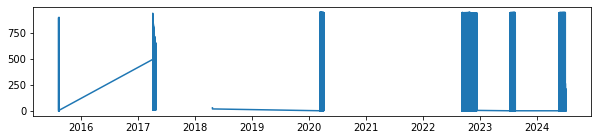

In [691]:
fig , axs =  plt.subplots(1,1, figsize=(10,2))
#
ax = axs
ax.plot(dt,z)

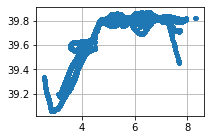

In [695]:
fig , axs =  plt.subplots(1,1, figsize=(3,2))
#
ax = axs
ax.plot(lon,lat,'.')
ax.grid()

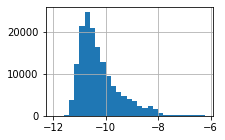

In [696]:
fig , axs =  plt.subplots(1,1, figsize=(3,2))
#
ax = axs
ax.hist(np.log10(e),bins=np.arange(-12,-6,.2))
ax.grid()

In [43]:
for attr in f.ncattrs():
    print(f"  {attr} = {getattr(f, attr)}")

  FOM_limit = 1.4
  acknowledgement = We thank all the technicians and engineers at SOCIB (Balearic Islands Coastal Observing and Forecasting System, Palma, Spain) and Rockland Scientific for their essential work in the deployment operations and data support throughout the various mission years.
  address = CNR ISMAR – Institute of Marine Science, Arsenale – Tesa 104, Castello 2737/F, 30122 Venezia, Italy
  area = Western Mediterranean Sea
  authors = Florian V. M. Kokoszka, Mireno Borghini, Katrin Schroeder, Jacopo Chiggiato, Albert Mirrales, Joaquín Tintoré, Nikolaos Zarokanellos, Albert Miralles, Patricia Rivera Rodríguez,Manuel Rubio, Miguel Charcos, Benjamín Casas, and Anneke T. Doeschate
  baselocation = Lerici (La Spezia), ITALY
  comment = This dataset was collected using a MicroRider-1000 microstructure package mounted on the glider "Teresa" during repeated missions between Sardinia and the Balearic Islands (2015–2024). It includes quality-controlled estimates of ε and χ deriv

In [44]:
print("\n📦 Attributs des variables :")
for var_name in f.variables:
    var = f.variables[var_name]
    print(f"\n▶ Variable '{var_name}'")
    for attr in var.ncattrs():
        print(f"  {attr} = {getattr(var, attr)}")


📦 Attributs des variables :

▶ Variable 'N_SECTION'

▶ Variable 'TIME_SPECTRA_SHEAR'

▶ Variable 'TIME_SPECTRA_THERM'

▶ Variable 'SECTION_INDEX'
  units = —
  standard_name = unique_identifier_for_each_section_of_data_from_timeseries

▶ Variable 'SECTION_fs_fast'
  units = Hz
  standard_name = fs_fast

▶ Variable 'SECTION_fs_slow'
  units = Hz
  standard_name = fs_slow

▶ Variable 'SECTION_profiling_direction'
  units = Logic
  standard_name = profiling_direction_updown

▶ Variable 'SECTION_speed_mean'
  units = m s-1
  standard_name = gliding_speed

▶ Variable 'SECTION_vehicle_length'
  units = m
  standard_name = vehicle_length

▶ Variable 'SECTION_tau_to_avoidadv'
  units = s
  standard_name = tau_to_avoidadv

▶ Variable 'SECTION_tau_to_resolve_05cpm'
  units = s
  standard_name = tau_to_resolve_05cpm

▶ Variable 'SECTION_tau_fft'
  units = s
  standard_name = tau_fft

▶ Variable 'SECTION_Pearson_TglT1'
  units = —
  standard_name = pearson_TglT1

▶ Variable 'SECTION_Pearson_TglT2